In [3]:
from scipy.stats import (
    norm, binom, expon, t, chi2, pareto, ttest_ind, sem, beta, laplace
)
from statsmodels.stats.proportion import proportion_confint
import numpy as numpy
from seaborn import distplot
from matplotlib import pyplot
import seaborn

import sys
sys.path.append('.')

import warnings
warnings.filterwarnings("ignore")

In [4]:
def inverse_plot_colorscheme():
    import cycler
    def invert(color_to_convert): 
        table = str.maketrans('0123456789abcdef', 'fedcba9876543210')
        return '#' + color_to_convert[1:].lower().translate(table).upper()
    update_dict = {}
    for key, value in pyplot.rcParams.items():
        if value == 'black':
            update_dict[key] = 'white'
        elif value == 'white':
            update_dict[key] = 'black'
    
    old_cycle = pyplot.rcParams['axes.prop_cycle']
    new_cycle = []
    for value in old_cycle:
        new_cycle.append({
            'color': invert(value['color'])
        })
    pyplot.rcParams.update(update_dict)
    pyplot.rcParams['axes.prop_cycle'] = cycler.Cycler(new_cycle)
    lec = pyplot.rcParams['legend.edgecolor']
    lec = str(1 - float(lec))
    pyplot.rcParams['legend.edgecolor'] = lec

In [5]:
inverse_plot_colorscheme()

# –õ–µ–∫—Ü–∏—è 6. –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ

–°–µ–≥–æ–¥–Ω—è –º—ã –ø–æ–≥–æ–≤–æ—Ä–∏–º –æ –º–µ—Ç–æ–¥–µ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ, —è–≤–ª—è—é—â–∏–º—Å—è –æ—á–µ–Ω—å –º–æ—â–Ω—ã–º –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–º –≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ. –° –µ–≥–æ –ø–æ–º–æ—â—å—é –º—ã –æ—Ç–≤–µ—Ç–∏–º —Å –≤–∞–º–∏ –Ω–∞ 3 –≤–æ–ø—Ä–æ—Å–∞:
- –ö–∞–∫ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≤–∞—à –∫—Ä–∏—Ç–µ—Ä–∏–π? –í–∞–ª–∏–¥–µ–Ω –æ–Ω –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –∏–ª–∏ –Ω–µ—Ç?
    - –ù–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–±–æ—Ç–∞–µ—Ç –ª–∏ t-test –Ω–∞ –º–∞–ª—ã—Ö —Ä–∞–∑–º–µ—Ä–∞—Ö –≤—ã–±–æ—Ä–æ–∫?
- –£ –≤–∞—Å –µ—Å—Ç—å 2 —Ä–∞–∑–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏—è. –ö–∞–∫ –ø–æ–Ω—è—Ç—å, –∫–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –ª—É—á—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –≤–∞—à–µ–π –∑–∞–¥–∞—á–∏?
<!-- - –ö–∞–∫ –∂–∏—Ç—å, –µ—Å–ª–∏ –º—ã –Ω–µ –∑–Ω–∞–µ–º —Ç–µ–æ—Ä.–≤–µ—Ä? –ö–∞–∫ –ø—Ä–∏–¥—É–º—ã–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, –µ—Å–ª–∏ –º—ã –Ω–µ —Ö–æ—Ç–∏–º –Ω–∏—á–µ–≥–æ —Å—á–∏—Ç–∞—Ç–∞—Ç—å? –í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞—è—Ö —É –≤–∞—Å –ø–æ—è–≤–∏—Ç—Å—è –æ—Ç–≤–µ—Ç –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å) -->

## 1. –ü—Ä–æ–≤–µ—Ä–∫–∞ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤

–° –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –º—ã –≤ *–æ–±—â–µ–º —Å–ª—É—á–∞–µ* —Å–º–æ–∂–µ–º –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã:
- **–ú–æ–∂–Ω–æ –ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏?**
- **–í–µ—Ä–Ω–æ –ª–∏ –≤–æ–æ–±—â–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –∫—Ä–∏—Ç–µ—Ä–∏–π?**

–í—Å—è —ç—Ç–∞ –≥–ª–∞–≤–∞ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å –±—É–¥–µ—Ç –ø–æ—Å–≤—è—â–µ–Ω–∞ AB-—Ç–µ—Å—Ç–∞–º –∏ –∫–∞–∫ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ –¥–ª—è –Ω–∏—Ö. –û—Å–Ω–æ–≤–Ω—ã–º –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≤ —ç—Ç–æ–π –≥–ª–∞–≤–µ —Å—Ç–∞–Ω–µ—Ç t-test. –ú—ã —Å –≤–∞–º–∏:
- –ü–æ–∫–∞–∂–µ–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, —á—Ç–æ t-test —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è –≤—ã–±–æ—Ä–æ–∫ –Ω–µ —Ç–æ–ª—å–∫–æ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
- –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, —Å –∫–∞–∫–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏ –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å t-test. –ö–∞–∫ –º—ã –ø–æ–º–Ω–∏–º –∏–∑ –ø—Ä–æ—à–ª–æ–π –ª–µ–∫—Ü–∏–∏, t-test —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –¥–ª—è –≤—ã–±–æ—Ä–æ–∫ –∏–∑ –ª—é–±–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∞—è. 


|                          | –º–∞–ª–µ–Ω—å–∫–∞—è –≤—ã–±–æ—Ä–∫–∞ | –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞ |
|--------------------------|-------------------|-----------------|
| –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ | t-test            | t-test |
| –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ      |                   | t-test |

---

–ß—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π –∫–æ—Ä—Ä–µ–∫—Ç–µ–Ω? –î–∞–≤–∞–π—Ç–µ –ø–æ–π–¥–µ–º –æ—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
- –ö—Ä–∏—Ç–µ—Ä–∏–π —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–µ–≤–µ—Ä–Ω–æ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É $\le \alpha$. 
- –ê —ç—Ç–æ –≤ —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –µ—Å–ª–∏ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ –º–Ω–æ–≥–æ —Ä–∞–∑ –ø–æ–≤—Ç–æ—Ä–∏—Ç—å –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç, –≤ –∫–æ—Ç–æ—Ä–æ–º –≤–µ—Ä–Ω–∞ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞, –≥–µ–Ω–µ—Ä–∏—Ä—É—è –∑–∞–Ω–æ–≤–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç, —Ç–æ —á–∏—Å–ª–æ –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏–π –±—É–¥–µ—Ç –º–µ–Ω—å—à–µ $\alpha$ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤.

–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ, –∑–¥–µ—Å—å —É–∂–µ —Ä–∞—Å–∫–∞–∑–∞–Ω–∞ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞, –∫–∞–∫ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≤–∞—à –∫—Ä–∏—Ç–µ—Ä–∏–π :)

0. –°–æ–∑–¥–∞–µ–º –∫–æ–¥ –∫—Ä–∏—Ç–µ—Ä–∏—è, –∫–æ—Ç–æ—Ä—ã–π –º—ã –±—É–¥–µ–º –ø—Ä–æ–≤–µ—Ä—è—Ç—å.
1. –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –≥–¥–µ –≤–µ—Ä–Ω–∞ $H_0$. 
2. –ü—Ä–æ–≥–æ–Ω—è–µ–º –Ω–∞ –Ω–∏—Ö –ø—Ä–∏–¥—É–º–∞–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π.
3. –ü—Ä–æ–≤–µ—Ä—è–µ–º, –ø—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ —Ç–æ–ª—å–∫–æ –≤ $\alpha$ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ —Å–ª—É—á–∞–µ–≤ –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è?

–ê —Ç–µ–ø–µ—Ä—å —Ä–∞—Å–ø–∏—à–µ–º –ø–æ–¥—Ä–æ–±–Ω–µ–µ:
1. –ü–µ—Ä–≤—ã–º –¥–µ–ª–æ–º –Ω–∞–¥–æ –≤—ã–±—Ä–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –±—É–¥–µ—Ç –æ–ø–∏—Å—ã–≤–∞—Ç—å –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ. –ö –ø—Ä–∏–º–µ—Ä—É, –µ—Å–ª–∏ —É –Ω–∞—Å –º–µ—Ç—Ä–∏–∫–∞ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏, —Ç–æ —ç—Ç–æ –±–µ—Ä–Ω—É–ª–ª–µ–≤—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –∞ –µ—Å–ª–∏ –º–µ—Ç—Ä–∏–∫–∞ ‚Äî –≤—ã—Ä—É—á–∫–∞, —Ç–æ –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å–∞–º–æ–≥–æ –ø—Ä–æ—Å—Ç–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è.

2. –ó–∞–≤–µ—Å—Ç–∏ —Å—á—ë—Ç—á–∏–∫ bad_cnt = 0.

3. –î–∞–ª–µ–µ –≤ —Ü–∏–∫–ª–µ —Ä–∞–∑–º–µ—Ä–∞ N, –≥–¥–µ N ‚Äî –Ω–∞—Ç—É—Ä–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –æ—Ç 1000 –¥–æ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏ (—á–µ–º –æ–Ω–æ –±–æ–ª—å—à–µ, —Ç–µ–º –ª—É—á—à–µ):
   - –°–∏–º—É–ª–∏—Ä–æ–≤–∞—Ç—å —Å–æ–∑–¥–∞–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –Ω–∞ –ø–µ—Ä–≤–æ–º —à–∞–≥–µ. –¢–∞–∫, —á—Ç–æ–±—ã –≤–µ—Ä–Ω–∞ –±—ã–ª–∞ $H_0$.
        - –ê –≤ —Å–ª—É—á–∞–µ AB-—Ç–µ—Å—Ç–∞ —Å–∏–º—É–ª–∏—Ä–æ–≤–∞—Ç—å –Ω–∞–¥–æ –Ω–µ 1 –≤—ã–±–æ—Ä–∫—É, –∞ 2: –¥–ª—è —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è.

    - –ó–∞–ø—É—Å—Ç–∏—Ç—å –Ω–∞ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–æ–≤–µ—Ä—è–µ–º—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π.

    - –î–∞–ª–µ–µ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, `pvalue < alpha`. –ï—Å–ª–∏ –¥–∞, —Ç–æ —É–≤–µ–ª–∏—á–∏—Ç—å —Å—á—ë—Ç—á–∏–∫ bad_cnt –Ω–∞ 1. –ó–¥–µ—Å—å –º—ã –ø—Ä–æ–≤–µ—Ä—è–µ–º, –æ—à–∏–±—Å—è –ª–∏ –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ —Ç–µ–∫—É—â–µ–π —Å–∏–º—É–ª—è—Ü–∏–∏, –∏–ª–∏ –Ω–µ—Ç. 

4. –ü–æ—Å—á–∏—Ç–∞—Ç—å –∫–æ–Ω–≤–µ—Ä—Å–∏—é bad_cnt / N.
    - –ï—Å–ª–∏ –æ–Ω–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å $\alpha$, —Ç–æ –≤—Å–µ —Ö–æ—Ä–æ—à–æ.
    - –ï—Å–ª–∏ –æ–Ω–∞ –º–µ–Ω—å—à–µ $\alpha$, —Ç–æ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ —ç—Ç–æ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, –ø—Ä–æ—Å—Ç–æ –æ–Ω –±—É–¥–µ—Ç –º–µ–Ω–µ–µ –º–æ—â–Ω—ã–π, —á–µ–º –∫—Ä–∏—Ç–µ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–π –æ—à–∏–±–∞–µ—Ç—Å—è —Ä–æ–≤–Ω–æ –≤ $\alpha$ –ø—Ä–æ—Ü–µ–Ω—Ç–µ —Å–ª—É—á–∞–µ–≤.
        - –ù–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å: –∞ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ —Ç–∞–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –≤–æ–∑–º–æ–∂–Ω–∞? –ò–ª–∏ —ç—Ç–æ –æ—à–∏–±–∫–∞ –≤ –∫–æ–¥–µ –∫—Ä–∏—Ç–µ—Ä–∏—è?
    - –ï—Å–ª–∏ –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—à–∏–±–∞–µ—Ç—Å—è –±–æ–ª—å—à–µ, —á–µ–º –≤ $\alpha$, —Ç–æ –∑–Ω–∞—á–∏—Ç –æ–Ω –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–µ–Ω –∏ –∏–º –Ω–µ–ª—å–∑—è –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è. –ò—Å–ø–æ–ª—å–∑—É—è —Ç–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π, –≤—ã –±—É–¥–µ—Ç–µ –æ—à–∏–±–∞—Ç—å—Å—è —á–∞—â–µ –ø–æ–ª–æ–∂–µ–Ω–Ω–æ–≥–æ, –∞ –∑–Ω–∞—á–∏—Ç –≤–∞—à–∞  –∫–æ–º–ø–∞–Ω–∏—è –±—É–¥–µ—Ç —Ç–µ—Ä—è—Ç—å –±–æ–ª—å—à–µ –¥–µ–Ω–µ–≥.
    
    
–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ—Ü–µ–¥—É—Ä—É –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ: –ø—Ä–æ–≤–µ—Ä–∏–º, –º–æ–∂–Ω–æ –ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å t-test –¥–ª—è –≤—ã–±–æ—Ä–æ–∫ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è?

In [6]:
numpy.random.seed(42)

bad_cnt = 0
N = 10000
alpha=0.05

sample_dist = norm(loc=2, scale=3)
mu0=sample_dist.expect()
for i in range(N):
    # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è
    test    = sample_dist.rvs(5)
    control = sample_dist.rvs(5)

    # –ó–∞–ø—É—Å–∫–∞—é –∫—Ä–∏—Ç–µ—Ä–∏–π –∏ —Å—á–∏—Ç–∞—é p-value
    pvalue = ttest_ind(test, control, alternative='two-sided').pvalue
    
    # –ü—Ä–æ–≤–µ—Ä—è—é, —á—Ç–æ pvalue < alpha
    bad_cnt += (pvalue < alpha)


print(f"FPR: {round(bad_cnt / N, 4)}")

FPR: 0.0519


–•–º, –º—ã –ø–æ–ª—É—á–∏–ª–∏, —á—Ç–æ FPR=0.0519, —Ö–æ—Ç—è –æ–Ω –¥–æ–ª–∂–µ–Ω –±—ã–ª —Ä–∞–≤–Ω—è—Ç—å—Å—è 5%. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–µ–Ω? –ù—É –∫–æ–Ω–µ—á–Ω–æ –Ω–µ—Ç, –º—ã –ø—Ä–æ—Å—Ç–æ –Ω–µ —É—á–ª–∏ —à—É–º  –∫–æ–Ω–≤–µ—Ä—Å–∏–∏: –º—ã –≤—Ä—è–¥ –ª–∏ —Å–º–æ–∂–µ–º –ø–æ–ª—É—á–∏—Ç—å –Ω–∞ –∫–æ–Ω–µ—á–Ω–æ–º —á–∏—Å–ª–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Ç–æ—á–Ω–æ–µ —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ `FPR=alpha`.

–ü–æ—ç—Ç–æ–º—É –Ω–∞–¥–æ —á—É—Ç—å —É–ª—É—á—à–∏—Ç—å 4 —à–∞–≥:

4. –ü–æ—Å—á–∏—Ç–∞—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–π FPR –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –Ω–µ–≥–æ. –ï—Å–ª–∏ $\alpha$ –ª–µ–∂–∏—Ç –≤ –Ω–µ–º, –∑–Ω–∞—á–∏—Ç –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –∞ –∏–Ω–∞—á–µ —Ä–∞–∑–±–∏—Ä–∞–µ–º—Å—è, —á—Ç–æ –ø–æ—à–ª–æ –Ω–µ —Ç–∞–∫.
    - –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –º–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞–∑–Ω—ã–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏: –Ω–∞–ø—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑—É—è –∏–¥–µ–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –∏–∑ –≤—Ç–æ—Ä–æ–π –ª–µ–∫—Ü–∏–∏.
    - –ù–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–æ—â–µ: –≤ –ø–∏—Ç–æ–Ω–µ –µ—Å—Ç—å —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è —Å—Ç—Ä–æ–∏—Ç [–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –£–∏–ª—Å–æ–Ω–∞](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Wilson_score_interval): –æ–Ω –Ω–µ —Ç–∞–∫–æ–π —Ç–æ—á–Ω—ã–π, –∫–∞–∫ –º—ã –≤—ã–≤–æ–¥–∏–ª–∏ —Ä–∞–Ω–µ–µ, –∑–∞—Ç–æ –æ–Ω –±–æ–ª–µ–µ –±—ã—Å—Ç—Ä—ã–π –∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –∏–∑ "–∫–æ—Ä–æ–±–∫–∏". –ï–≥–æ –Ω–µ –Ω–∞–¥–æ —Ä–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞—Ç—å —Å–∞–º–æ–º—É.

In [7]:
proportion_confint(count = bad_cnt, nobs = N, alpha=0.05, method='wilson')

(0.04772180742973847, 0.05642233191006188)

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ 5% –ø–æ–ø–∞–ª–∏ –≤ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª, –∞ –∑–Ω–∞—á–∏—Ç –º—ã –º–æ–∂–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π –≤–∞–ª–∏–¥–µ–Ω –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏.

–ê —á—Ç–æ, –µ—Å–ª–∏ –±—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—ã–ª–æ —Å–ª–æ–∂–Ω–µ–µ?

–†–∞—Å—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–∏–º–µ—Ä, –∫–æ–≥–¥–∞ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—è –≤ —Ç–µ—Å—Ç–µ –∏ –≤ –∫–æ–Ω—Ç—Ä–æ–ª–µ —Ä–∞–≤–Ω—ã, –Ω–æ –≤—ã–±–æ—Ä–∫–∏ –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π. –¢–æ –µ—Å—Ç—å $H_0$ –≤–µ—Ä–Ω–∞, –Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞–∑–Ω—ã–µ.

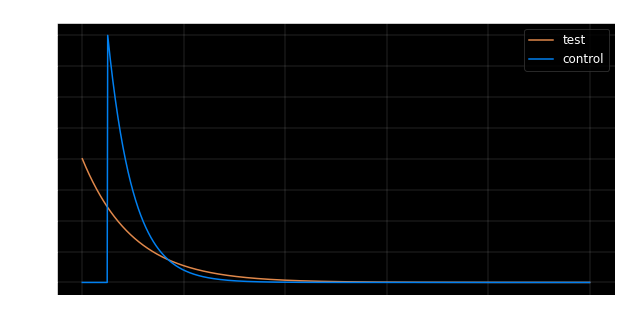

In [8]:
test_dist = expon(scale = 10)
control_dist = expon(loc=5, scale = 5)

x = numpy.linspace(0, 100, 1000)

pyplot.figure(figsize=(10, 5))
pyplot.title('–ü—Ä–∏–º–µ—Ä —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π', fontsize=12)
pyplot.plot(x, test_dist.pdf(x), label='test')
pyplot.plot(x, control_dist.pdf(x), label='control')
pyplot.xlabel('–í—ã—Ä—É—á–∫–∞')
pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')

pyplot.legend(fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

–ù–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–Ω—å—à–µ –≤ —Å—Ä–µ–¥–Ω–µ–º –≤—ã—Ä—É—á–∫–∞ –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –±—ã–ª–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ 10 —Ä—É–± –∏ –æ–Ω–∞ –±—ã–ª–∞ –Ω–µ –º–µ–Ω—å—à–µ 5 —Ä—É–±–ª–µ–π, –∞ –ø–æ—Å–ª–µ –≤–≤–µ–¥–µ–Ω–∏—è —ç—Ñ—Ñ–µ–∫—Ç–∞ —á–∞—Å—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å—Ç–∞–ª–∞ –º–µ–Ω—å—à–µ –ø–ª–∞—Ç–∏—Ç—å, –Ω–æ —Å—Ä–µ–¥–Ω–∏–π —á–µ–∫ –æ—Å—Ç–∞–ª—Å—è —Ç–∞–∫–∏–º –∂–µ: 10 —Ä—É–±.

In [21]:
def check_criterion(test_dist, control_dist, sample_size, N_exps=10000, to_print=True):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ t-test –∫—Ä–∏—Ç–µ—Ä–∏—è –¥–ª—è AB-—Ç–µ—Å—Ç–∞
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è FPR, –µ—Å–ª–∏ —Ñ–ª–∞–≥ to_print = False. –ò–Ω–∞—á–µ –ø–µ—á–∞—Ç–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
    
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
            - test_dist: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ
            - control_dist: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ
            - sample_size: —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è
            - N_exps: —á–∏—Å–ª–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –ø–æ—Ç–æ–º —Å—á–∏—Ç–∞–µ—Ç—Å—è FPR
            - to_print: –ø–µ—á–∞—Ç–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏–ª–∏ –Ω–µ—Ç. –ï—Å–ª–∏ –Ω–µ—Ç, —Ç–æ —Ñ—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è FPR.
    """
    
    numpy.random.seed(35)
    bad_cnt=0
    alpha=0.05

    for i in range(N_exps):
        # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É
        test    = test_dist.rvs(sample_size)
        control = control_dist.rvs(sample_size)

        # –ó–∞–ø—É—Å–∫–∞—é –∫—Ä–∏—Ç–µ—Ä–∏–π –∏ —Å—á–∏—Ç–∞—é p-value
        pvalue = ttest_ind(test, control, equal_var=False, alternative='two-sided').pvalue

        # –ü—Ä–æ–≤–µ—Ä—è—é, —á—Ç–æ pvalue < alpha
        bad_cnt += (pvalue < alpha)

    if to_print:
        print(f"FPR: {round(bad_cnt / N_exps, 4)}")
        print(f"CI={proportion_confint(count = bad_cnt, nobs = N_exps, alpha=0.05, method='wilson')}")
    else:
        return proportion_confint(count = bad_cnt, nobs = N_exps, alpha=0.05, method='wilson')

In [22]:
check_criterion(test_dist=test_dist, control_dist=control_dist, sample_size=20)

FPR: 0.0443
CI=(0.04043912932872393, 0.04851084678631071)


–ß—Ç–æ –∂, –º—ã –≤–∏–¥–∏–º, —á—Ç–æ t-test –Ω–µ —Å—Ä–∞–±–æ—Ç–∞–ª. –ò—Å—Ç–∏–Ω–Ω–æ–µ $\alpha$ –Ω–µ –ª–µ–∂–∏—Ç –≤ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ. –ù–æ —Å –∫–∞–∫–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫ t-test –Ω–∞—á–Ω–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ?

### –ö–∞–∫ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º t-test —Ä–∞–±–æ—Ç–∞–µ—Ç?

–î–ª—è —ç—Ç–æ–≥–æ –¥–∞–≤–∞–π—Ç–µ –ø—Ä–æ—Å–∏–º—É–ª–∏—Ä—É–µ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å —Ä–∞–∑–Ω—ã–º —Ä–∞–∑–º–µ—Ä–æ–º –≤—ã–±–æ—Ä–æ–∫ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —Å –∫–∞–∫–æ–≥–æ —Ä–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–∫–∏ —É –Ω–∞—Å $\alpha$% –ª–µ–∂–∏—Ç –≤ –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ.

In [23]:
scale = numpy.arange(20, 110, 20)
for N in scale:
    left, right = check_criterion(test_dist=test_dist, control_dist=control_dist, sample_size=N, N_exps=10000, to_print=False)
    if left < alpha < right:
        print(f"Min sample size: {N}")
        break

Min sample size: 40


In [24]:
check_criterion(test_dist=test_dist, control_dist=control_dist, sample_size=60)

FPR: 0.0488
CI=(0.04474778133939989, 0.05319873879029866)


–¢–∞–∫ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ 60 &mdash; 5% —É–∂–µ –ø–æ–ø–∞–ª–∏ –≤ –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª. –¢–∞–∫ —á—Ç–æ –º—ã –º–æ–∂–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –¥–ª—è —Ç–∞–∫–∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –Ω–∞–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ 60, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å t-test. 

–ù–æ –Ω–∞–¥–æ –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ —Ä–µ–∞–ª—å–Ω—ã–π FPR –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ 5%: –æ–Ω –ª–µ–∂–∏—Ç –≤ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ (0.045, 0.053). –ï—Å–ª–∏ –Ω—É–∂–Ω–∞ –±–æ–ª—å—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å &mdash; –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –±–æ–ª—å—à–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ (`N_exps -> infinity`)


## –ò—Ç–æ–≥–æ

–ß—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π, –Ω–∞–¥–æ —É–º–µ—Ç—å –º–Ω–æ–≥–æ —Ä–∞–∑ –ø—Ä–æ–≤–æ–¥–∏—Ç—å –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç.
- –ü—Ä–∞–≤–∏–ª—å–Ω–æ –ª–∏ —Ä–µ–∞–ª–∏–∑–æ—Ä–≤–∞–Ω –∫—Ä–∏—Ç–µ—Ä–∏–π?
    - –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –µ–≥–æ! –ú–æ–∂–Ω–æ –Ω–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ —Å–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –ú–æ–∂–Ω–æ –ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏?
    - –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –µ–≥–æ! –ù–æ —Ç–æ–ª—å–∫–æ –Ω—É–∂–Ω–æ **–ø—Ä–∞–≤–∏–ª—å–Ω–æ** —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç.
- –ö–∞–∫ –Ω–∞–π—Ç–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ —É t-test?
    - –ü—Ä–≤–µ—Ä—å—Ç–µ t-test –Ω–∞ —Ä–∞–∑–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–∞—Ö –≤—ã–±–æ—Ä–∫–∏. –° —Ç–æ–≥–æ –º–æ–º–µ–Ω—Ç–∞, –∫–∞–∫ $\alpha$% –ª–µ–∂–∏—Ç –≤ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ &mdash; –º–æ–∂–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ t-test –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å.


# –ö–∞–∫ —Å–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç?

–ï—Å—Ç—å 2 –æ—Ç–≤–µ—Ç–∞ –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å:
1. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è —á–µ—Ä–µ–∑ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –° –ø–æ–º–æ—â—å—é —Ä–∞–∑–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –º–æ–∂–Ω–æ –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è –ø—Ä–∏–±–ª–∏–∑–∏—Ç—å —Ä–µ–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö. –ù–∞–ø—Ä–∏–º–µ—Ä:
    - –î–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –≤—ã—Ä—É—á–∫–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ß–µ–º –±–æ–ª—å—à–µ –≤—ã—Ä—É—á–∫–∞ –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è &mdash; —Ç–µ–º –º–µ–Ω—å—à–µ —Ç–∞–∫–∏—Ö –ª—é–¥–µ–π.
    - –î–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∫–æ–Ω–≤–µ—Ä—Å–∏–æ–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–ª–∏–∫–Ω–µ—Ç/–Ω–µ –∫–ª–∏–Ω–∫–µ—Ç) –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–µ—Ä–Ω—É–ª–ª–∏–µ–≤—Å–∫—É—é –≤—ã–±–æ—Ä–∫—É.
    - –ò–Ω–æ–≥–¥–∞ –º–æ–∂–Ω–æ –±—Ä–∞—Ç—å —Å–º–µ—Å—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π: –ø—É—Å—Ç—å 90% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–π –Ω–∞—à–µ–≥–æ —Å–∞–π—Ç–∞ –ø—Ä–∏–Ω–æ—Å—è—Ç –Ω—É–ª–µ–≤—É—é –≤—ã—Ä—É—á–∫—É. –¢–æ–≥–¥–∞ –º–æ–∂–Ω–æ –ø–µ—Ä–µ–º–Ω–æ–∂–∏—Ç—å –±–µ—Ä–Ω—É–ª–ª–∏–µ–≤—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –≤—ã—Ä—É—á–∫–∏ –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.
    - –¢–∞–∫–∂–µ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∫—Ä–∏–µ—Ç—Ä–∏—è –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ —Ç–µ—Å—Ç–µ –∏ –≤ –∫–æ–Ω—Ç—Ä–æ–ª–µ –¥–æ–ª–∂–Ω—ã —Å–æ–≤–ø–∞–¥–∞—Ç—å. –î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ —Å—Ä–µ–¥–Ω–∏—Ö –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –¥–æ–ª–∂–Ω—ã —Å–æ–≤–ø–∞–¥–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ —Ç–µ—Å—Ç–µ –∏ –≤ –∫–æ–Ω—Ç—Ä–æ–ª–µ. –û–Ω–∏ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–º–∏, –Ω–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ —Å–æ–≤–ø–∞–¥–µ—Ç, –∫–∞–∫ –±—ã–ª–æ –≤ –ø—Ä–∏–º–µ—Ä–µ –≤—ã—à–µ.
    
---     
    
2.  –î–∞—Ç–∞—Å–µ—Ç—ã –Ω–∞ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏–∏. –£ –º–Ω–æ–≥–∏—Ö –∫–æ–º–ø–∞–Ω–∏–π –µ—Å—Ç—å –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ —Å–æ–±—ã—Ç–∏–π. –¢–æ–≥–¥–∞ –º—ã —Å–º–æ–∂–µ–º –ø—Ä—è–º–æ –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–∏—Ç—å —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏—è! –ò –Ω–µ –ø–æ–ø–∞—Å—Ç—å—Å—è –≤ –ª–æ–≤—É—à–∫—É —Ç–æ–≥–æ, —á—Ç–æ –Ω–∞ –∏—Å–∫—É—Å—Ç–≤–µ–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –∫—Ä–∏—Ç–µ—Ä–∏–π –≤–∞–ª–∏–¥–µ–Ω, –∞ –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç. –ù–∞–ø—Ä–∏–º–µ—Ä, —É –Ω–∞—Å –µ—Å—Ç—å –¥–∞–Ω–Ω—ã–µ –æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç. –≠—Ç–æ —É–∂–µ –æ–¥–∏–Ω –≥–æ—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç: –≤—ã –¥–µ–ª–∏—Ç–µ –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ —Ç–µ—Å—Ç –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å –∏ –ø–æ–ª—É—á–∞–µ—Ç–µ –æ–¥–∏–Ω ¬´—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç¬ª –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≤–∞—à–µ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. 

–û—Å—Ç–∞–ª–æ—Å—å –ø–æ–Ω—è—Ç—å, –∫–∞–∫ –∏–∑ –æ–¥–Ω–æ–≥–æ –±–æ–ª—å—à–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–¥–µ–ª–∞—Ç—å N –º–∞–ª–µ–Ω—å–∫–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤. –Ø —Ä–∞—Å—Å–∫–∞–∂—É, –∫–∞–∫ –º—ã —ç—Ç–æ –¥–µ–ª–∞–µ–º –≤ –ê–≤–∏—Ç–æ, –Ω–æ –æ–ø–∏—Å–∞–Ω–Ω–∞—è –º–µ—Ö–∞–Ω–∏–∫–∞ –ø—Ä–∏–º–µ–Ω–∏–º–∞ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∫ –ª—é–±–æ–π –∫–æ–º–ø–∞–Ω–∏–∏.

–ù–∞—à–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Ä–∞–∑–º–µ—â–∞—é—Ç –æ–±—ä—è–≤–ª–µ–Ω–∏—è. –ö–∞–∂–¥–æ–µ –æ–±—ä—è–≤–ª–µ–Ω–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Ç–æ–ª—å–∫–æ –∫ –æ–¥–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–æ–≤ –∏ —Ä–∞–∑–º–µ—â–µ–Ω–æ —Ç–æ–ª—å–∫–æ –≤ –æ–¥–Ω–æ–º —Ä–µ–≥–∏–æ–Ω–µ. –û—Ç—Å—é–¥–∞ –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –Ω–µ–∑–∞–º—ã—Å–ª–æ–≤–∞—Ç—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º:

 - –†–∞–∑–æ–±—å—ë–º –≤—Å–µ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ —á–µ—Ç—ã—Ä–µ (–∏–ª–∏ N –≤ –æ–±—â–µ–º —Å–ª—É—á–∞–µ) –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: –∞–≤—Ç–æ–º–æ–±–∏–ª–∏, —Å–ø–µ—Ü—Ç–µ—Ö–Ω–∏–∫–∞, —É—Å–ª—É–≥–∏ –∏ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å. –¢–µ–ø–µ—Ä—å –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –º–æ–∂–Ω–æ —Ä–∞–∑–±–∏—Ç—å –Ω–∞ —ç—Ç–∏ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏: –∫ –ø—Ä–∏–º–µ—Ä—É, –≤ –æ–¥–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Å–º–æ—Ç—Ä–µ—Ç—å –≤—ã—Ä—É—á–∫—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Ç–æ–ª—å–∫–æ –≤ —ç—Ç–æ–π –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏.

 - –ü–æ–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç—ã –ø–æ –º–µ—Å—è—Ü–∞–º: –¥–∞—Ç–∞—Å–µ—Ç —Ç—Ä–∞—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∑–∞ –Ω–æ—è–±—Ä—å, –∑–∞ –¥–µ–∫–∞–±—Ä—å –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.

 - –ï—â—ë –≤—Å–µ –º–µ—Ç—Ä–∏–∫–∏ –º–æ–∂–Ω–æ –ø–æ–¥–µ–ª–∏—Ç—å –ø–æ —Å—É–±—ä–µ–∫—Ç–∞–º –†–§ –∏–ª–∏ –ø–æ –≥—Ä—É–ø–ø–µ —Å—É–±—ä–µ–∫—Ç–æ–≤: –¥–∞—Ç–∞—Å–µ—Ç —Ç—Ä–∞—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏–∑ –ú–æ—Å–∫–≤—ã, –¥–∞—Ç–∞—Å–µ—Ç —Ç—Ä–∞—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏–∑ –•–∞–±–∞—Ä–æ–≤—Å–∫–∞ –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.
 
 - –û–±—ä–µ–¥–Ω–∏–º –≤—Å–µ 3 –ø—Ä–∞–≤–∏–ª–∞ –≤ –æ–¥–Ω–æ. –ù–∞–ø—Ä–∏–º–µ—Ä: –¥–∞—Ç–∞—Å–µ—Ç —Ç—Ä–∞—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ –ê–≤—Ç–æ –∑–∞ –Ω–æ—è–±—Ä—å –≤ –ú–æ—Å–∫–≤–µ.

 - –¢–µ–ø–µ—Ä—å —É –Ω–∞—Å –µ—Å—Ç—å –±–æ–ª—å—à–æ–µ —á–∏—Å–ª–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ –≤ –∫–∞–∂–¥–æ–º –∏–∑ –Ω–∏—Ö –µ—Å—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏. –ü–æ–¥–µ–ª–∏–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å–ª—É—á–∞–π–Ω–æ –Ω–∞ —Ç–µ—Å—Ç –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å –∏ –ø–æ–ª—É—á–∏–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –¥–∞—Ç–∞—Å–µ—Ç—ã –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø—Ä–∏–¥—É–º–∞–Ω–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤.

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–∞—Ö, –∫–∞–∫ —Ç–∞–∫–∞—è —Å—Ö–µ–º–∞ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:
    <img src="https://habrastorage.org/getpro/habr/upload_files/71a/497/8cb/71a4978cbbb1f177c5edb360456f3e90.png" width="1500" height="200" />


–ó–¥–µ—Å—å –º—ã —Å–º–æ–≥–ª–∏ —Ä–∞–∑–±–∏—Ç—å 1 –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ 16 –¥–∞—Ç–∞—Å–µ—Ç–æ–≤. –ê –µ—Å–ª–∏ –¥–æ–±–∞–≤–∏—Ç—å –µ—â—ë –∏ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å—É–±—ä–µ–∫—Ç–∞–º –†–§, –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–ª—å—à–µ 80, —Ç–æ –º—ã –ø–æ–ª—É—á–∏–º —É–∂–µ 16√ó80 = 1280 –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏. –ò —ç—Ç–æ –≤—Å–µ–≥–æ –∑–∞ 5 –º–µ—Å—è—Ü–µ–≤! –ü—Ä–∏ —ç—Ç–æ–º, –∫–∞–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø—Ä–∞–∫—Ç–∏–∫–∞, 1000 –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ, —á—Ç–æ–±—ã –æ—Ç–¥–µ–ª–∏—Ç—å –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Ç —Ö–æ—Ä–æ—à–µ–≥–æ.

**–°—Ä–∞–≤–Ω–∏–º 2 –º–µ—Ç–æ–¥–∞**

–ì–ª–∞–≤–Ω—ã–µ –ø–ª—é—Å—ã –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —Ç–æ–º, —á—Ç–æ –∏—Ö —Å–∫–æ–ª—å–∫–æ —É–≥–æ–¥–Ω–æ, –æ–Ω–∏ –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç—Å—è –±—ã—Å—Ç—Ä–æ, –∏ –≤—ã –ø–æ–ª–Ω–æ—Å—Ç—å—é –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ú–æ–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ –º–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ –æ—á–µ–Ω—å —Ç–æ—á–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –æ—à–∏–±–∫—É –ø–µ—Ä–≤–æ–≥–æ —Ä–æ–¥–∞ –≤–∞—à–µ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. –¢–∞–∫–∂–µ, –º–æ–π –æ–ø—ã—Ç –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—ã—Ö —ç—Ç–∞–ø–∞—Ö –¥–µ–±–∞–≥–∞ –Ω–æ–≤–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω–æ –ª—É—á—à–µ —Ä–µ–∞–ª—å–Ω—ã—Ö. –ì–ª–∞–≤–Ω—ã–π –º–∏–Ω—É—Å ‚Äî –≤—ã –ø–æ–ª—É—á–∏–ª–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –≤–∞—à–µ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è —Ç–æ–ª—å–∫–æ –Ω–∞ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö! –ù–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–π –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.

–£ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –≤—Å—ë –Ω–∞–æ–±–æ—Ä–æ—Ç: —Å–æ–±—Ä–∞—Ç—å –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ —Å–ª–æ–∂–Ω–æ, –¥–∞ –∏ –Ω–µ –≤—Å–µ–≥–¥–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω –ø—Ä–æ—Ü–µ—Å—Å —Å–±–æ—Ä–∞ –ª–æ–≥–æ–≤. –ù–æ –∞–¥–µ–∫–≤–∞—Ç–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑ –≤ –≤–∞—à–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –≤–æ–∑–º–æ–∂–Ω–∞ —Ç–æ–ª—å–∫–æ —Ç–∞–∫–∏–º —Å–ø–æ—Å–æ–±–æ–º. –í—Å–µ–≥–¥–∞ –º–æ–∂–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ç–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ù–æ, —Å—Ç–æ–ª–∫–Ω—É–≤—à–∏—Å—å –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ —Å –±–æ–ª–µ–µ —à—É–º–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏, –æ–Ω –º–æ–∂–µ—Ç –Ω–∞—á–∞—Ç—å –æ—à–∏–±–∞—Ç—å—Å—è —á–∞—â–µ, —á–µ–º –≤ 5% —Å–ª—É—á–∞–µ–≤. –ü–æ—ç—Ç–æ–º—É –≤–∞–∂–Ω–æ —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ –∏–º–µ–Ω–Ω–æ –Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –≤–µ—Ä–Ω–æ. 


----------

–ü–æ—Å–º–æ—Ç—Ä–∏–º –µ—â–µ —Ä–∞–∑ –Ω–∞ —Ç–∞–±–ª–∏—á–∫—É:

|                          | –º–∞–ª–µ–Ω—å–∫–∞—è –≤—ã–±–æ—Ä–∫–∞ | –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞ |
|--------------------------|-------------------|-----------------|
| –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ | t-test            | t-test |
| –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ      |                   | t-test |


–ú—ã —É–∂–µ –ø–æ–Ω—è–ª–∏, –∫–∞–∫ –æ—Ç–ª–∏—á–∏—Ç—å –º–∞–ª–µ–Ω—å–∫—É—é –≤—ã–±–æ—Ä–∫—É –æ—Ç –±–æ–ª—å—à–æ–π. –ù–æ –æ—Å—Ç–∞–ª—Å—è –ø–æ—Å–ª–µ–¥–Ω–∏–π –≤–æ–ø—Ä–æ—Å: —á–µ–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø–æ—Å–ª–µ–¥–Ω—é—é –ø—É—Å—Ç—É—é—â—É—é —è—á–µ–π–∫—É?

### –ú–æ–∂–Ω–æ –ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å t-test, –µ—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ –º–∞–ª–∞ –∏ –Ω–µ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è?


–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –æ—Ç–≤–µ—Ç –ø—Ä–æ—Å—Ç–æ–π: –ø—Ä–æ–≤–µ—Ä—å—Ç–µ –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–µ–º –≤–∞—Å —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏: –µ—Å–ª–∏ FPR $\leq \alpha$ –∑–Ω–∞—á–∏—Ç –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –∞ –µ—Å–ª–∏ –Ω–µ—Ç &mdash; –∫—Ä–∏—Ç–µ—Ä–∏–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ–ª—å–∑—è.


|                          | –º–∞–ª–µ–Ω—å–∫–∞—è –≤—ã–±–æ—Ä–∫–∞ | –±–æ–ª—å—à–∞—è –≤—ã–±–æ—Ä–∫–∞ |
|--------------------------|-------------------|-----------------|
| –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ | t-test               | t-test|
| –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ      | –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –ø—Ä–æ–≤–µ—Ä–∫–∞ | t-test |


–ù–∞–ø—Ä–∏–º–µ—Ä, –≤ —Å–ª—É—á–∞–µ –≤—ã—à–µ —Å –¥–≤—É–º—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏ &mdash; –Ω–µ–ª—å–∑—è. –ê –µ—Å–ª–∏ –±—ã –æ—à–∏–±–∫–∞ –±—ã–ª–∞ –±—ã –º–µ–Ω—å—à–µ 5% —Ç–æ –º–æ–∂–Ω–æ. –ù–∞–ø—Ä–∏–º–µ—Ä:

In [25]:
test_dist    = expon(scale=20)
control_dist = expon(scale=20)

check_criterion(test_dist=test_dist, control_dist=control_dist, sample_size=10)

FPR: 0.0396
CI=(0.03595116606388123, 0.04360241963583777)


–ó–¥–µ—Å—å FPR —Å—Ç–∞—Ç. –∑–Ω–∞—á–∏–º–æ –º–µ–Ω—å—à–µ 5%, –∞ –∑–Ω–∞—á–∏—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å t-test **–º–æ–∂–Ω–æ**. –¢–æ–ª—å–∫–æ –Ω–∞–¥–æ –±—ã—Ç—å –≥–æ—Ç–æ–≤—ã–º, —á—Ç–æ –æ–Ω –±—É–¥–µ—Ç –Ω–µ –æ—á–µ–Ω—å –º–æ—â–Ω—ã–º. 

---

## 2. –ö–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –ª—É—á—à–µ?

–ü—É—Å—Ç—å —É –≤–∞—Å –µ—Å—Ç—å 2 –∫—Ä–∏—Ç–µ—Ä–∏—è, –∏ –æ–±–∞ –≤–∞–ª–∏–¥–Ω—ã –Ω–∞ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –ö–∞–∫ –ø–æ–Ω—è—Ç—å –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, –∫–∞–∫–æ–π –∏–∑ –Ω–∏—Ö –ª—É—á—à–µ?

–ü—Ä–∞–≤–∏–ª—å–Ω—ã–π –æ—Ç–≤–µ—Ç &mdash; –Ω–∞–¥–æ —Å—Ä–∞–≤–Ω–∏—Ç—å –º–æ—â–Ω–æ—Å—Ç—å 2 –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤! –ù–æ –∫–∞–∫ –µ–µ —É–∑–Ω–∞—Ç—å?

–ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –ø–æ–≤—Ç–æ—Ä–∏—Ç—å —Ç—É –∂–µ –ø—Ä–æ—Ü–µ–¥—É—Ä—É, —á—Ç–æ –º—ã –¥–µ–ª–∞–ª–∏ –≤—ã—à–µ, —Ç–æ–ª—å–∫–æ –≤–º–µ—Å—Ç–æ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, –∫–æ–≥–¥–∞ –≤–µ—Ä–Ω–∞ $H_0$, –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç, –∫–æ–≥–¥–∞ –≤–µ—Ä–Ω–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞. –í —Å–ª—É—á–∞–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö &mdash; –Ω–∞–¥–æ –¥–æ–±–∞–≤–∏—Ç—å —ç—Ñ—Ñ–µ–∫—Ç –∫ —Ç–µ—Å—Ç—É. –ò –≤–º–µ—Å—Ç–æ FPR —Å—á–∏—Ç–∞—Ç—å TPR &mdash; —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –º—ã –æ—Ç–≤–µ—Ä–≥–ª–∏ –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –ß–µ–º –±–æ–ª—å—à–µ &mdash; —Ç–µ–º –ª—É—á—à–µ.

–¢–æ—á–Ω–æ —Ç–∞–∫–∂–µ –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ t-test.

In [120]:
numpy.random.seed(42)

rej_cnt = 0
N = 10000
alpha=0.05

sample_dist = norm(loc=2, scale=3)
mu=sample_dist.expect()

for i in range(N):
    # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è
    test    = sample_dist.rvs(15)
    control = sample_dist.rvs(15) * 2

    # –ó–∞–ø—É—Å–∫–∞—é –∫—Ä–∏—Ç–µ—Ä–∏–π –∏ —Å—á–∏—Ç–∞—é p-value
    pvalue = ttest_ind(test, control, equal_var=False, alternative='two-sided').pvalue
    
    # –ü—Ä–æ–≤–µ—Ä—è—é, —á—Ç–æ pvalue < alpha
    rej_cnt += (pvalue < alpha)


print(f"TPR –∏–ª–∏ –º–æ—â–Ω–æ—Å—Ç—å: {round(rej_cnt / N, 4)}")

TPR –∏–ª–∏ –º–æ—â–Ω–æ—Å—Ç—å: 0.1938


–í–∏–¥–∏–º, —á—Ç–æ –º–æ—â–Ω–æ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏—è –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —Ä–∞–Ω—è–µ—Ç—Å—è 19%. –ï—Å–ª–∏ –µ—Å—Ç—å –≤—Ç–æ—Ä–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π &mdash; –Ω–∞–¥–æ –∑–∞–ø—É—Å—Ç–∏—Ç—å —Ç–∞–∫—É—é –ø—Ä–æ–≤–µ—Ä–∫—É –¥–ª—è 2–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏ –æ—Ü–µ–Ω–∏—Ç—å, –∫–∞–∫–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π –ª—É—á—à–µ –∏–ª–∏ —Ö—É–∂–µ, –Ω–µ –∑–∞–±—ã–≤ –æ —Å—Ç–∞—Ç. –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏. –ü–æ–¥—Ä–æ–±–Ω–µ–µ –≤—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ —ç—Ç—É –ø—Ä–æ—Ü–µ–¥—É—Ä—É –≤ –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏.

–ï—â–µ –µ—Å—Ç—å –≤–æ–ø—Ä–æ—Å: –≤—ã –æ—Ü–µ–Ω–∏–ª–∏ 2 –∫—Ä–∏—Ç–µ—Ä–∏—è –ª–∏—à—å –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –æ–¥–Ω–æ–≥–æ —ç—Ñ—Ñ–µ–∫—Ç–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä –≤ —Å–ª—É—á–∞–µ –≤—ã—à–µ, –∫–æ–≥–¥–∞ $\mu_T = \mu_C * 2$. –ê –µ—Å–ª–∏ –±—ã –±—ã–ª–æ –¥—Ä—É–≥–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ, —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏—Å—å –±—ã —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —á—Ç–æ —ç—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –ª—É—á—à–µ? –ù–µ —Ñ–∞–∫—Ç, –ø–æ—ç—Ç–æ–º—É –ø–æ—ç—Ç–æ–º—É –Ω–∞–¥–æ –∏–¥–µ–∞–ª–æ–≥–∏—á–µ—Å–∫–∏ –ø–æ–¥–±–∏—Ä–∞—Ç—å —Ç–∞–∫–æ–π —ç—Ñ—Ñ–µ–∫—Ç, –∫–æ—Ç–æ—Ä—ã–π —á–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—Å—è –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ. –ü–æ—ç—Ç–æ–º—É –≤–∞—à–∞ –∑–∞–¥–∞—á–∞ –µ—â–µ –≤–µ—Ä–Ω–æ —Å—ã–º–∏—Ç–∏—Ä–æ–≤–∞—Ç—å —ç—Ñ—Ñ–µ–∫—Ç, –ø–æ—Ö–æ–∂–∏–π –Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏–π.
–õ–æ–≥–∏–∫–∞ –∑–¥–µ—Å—å —Ç–æ—á–Ω–æ —Ç–∞–∫–∞—è –∂–µ, –∫–∞–∫ –∏ –ø–æ—á–µ–º—É –ª—É—á—à–µ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –Ω–∞ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –∞ –Ω–µ –Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏—Ö.

–¢–æ –µ—Å—Ç—å, –≤–∞—à–∞ –∑–∞–¥–∞—á–∞ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –º–æ—â–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è —Å–æ—Å—Ç–æ–∏—Ç –≤:
1. –°–æ–∑–¥–∞–Ω–∏–∏ 1000 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –Ω–∞ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –∏–ª–∏ –Ω–∞ —Å–∏–º—É–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö
2. –ü–æ–¥–±–æ—Ä–µ —ç—Ñ—Ñ–µ–∫—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ª—É—á—à–µ –≤—Å–µ–≥–æ –∏–º–∏—Ç–∏—Ä–æ–≤–∞—Ç—å –∏—Å—Ç–∏–Ω–Ω—ã–π –ø—Ä–æ–≤–µ—Ä—è–µ–º—ã–π —ç—Ñ—Ñ–µ–∫—Ç –≤ –≥–∏–ø–æ—Ç–µ–∑–µ.


----

## –í –∑–∞–ø–∏—Å–∏ –Ω–µ –±—É–¥–µ—Ç

## 3. Bonus Section &mdash; –∫–∞–∫ —Å–æ–∑–¥–∞—Ç—å —Å–≤–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π?

–ò–∑ –∫–∞–∫–∏—Ö 2 —à–∞–≥–æ–≤ —Å–æ—Å—Ç–æ–∏—Ç —Å–æ–∑–¥–∞–Ω–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏—è?

1. –ü—Ä–∏–¥—É–º–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¥–ª—è –∫—Ä–∏—Ç–µ—Ä–∏—è
    - –ò –∑–¥–µ—Å—å —Ä–µ–¥–∫–æ —É –∫–æ–≥–æ –±—ã–≤–∞—é—Ç –ø—Ä–æ–±–ª–µ–º—ã. –í—ã –º–æ–∂–µ—Ç–µ –ø—Ä–∏–¥—É–º–∞—Ç—å –ª—é–±—É—é —Ñ—É–Ω–∫—Ü–∏—é –æ—Ç –≤—ã–±–æ—Ä–∫–∏ –∏ –ø–æ–ª—É—á–∏—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∫—Ä–∏—Ç–µ—Ä–∏—è.
2. –ü–æ–Ω—è—Ç—å, –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞.
    - –ê –≤–æ—Ç –∑–¥–µ—Å—å —É–∂–µ –∏ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è –≤—Å–µ –ø—Ä–æ–±–ª–µ–º—ã: –ø–æ—Ç–æ–º—É —á—Ç–æ —á–∞—â–µ –≤—Å–µ–≥–æ –≤—ã –Ω–µ –∑–Ω–∞–µ—Ç–µ, –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Ç–∞ –∏–ª–∏ –∏–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞.
    
–û–±—ã—á–Ω–æ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–æ –≤—Ç–æ—Ä–æ–º –ø—É–Ω–∫—Ç–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ç–µ–æ—Ä–≤–µ—Ä –¥–ª—è –≤—ã–≤–æ–¥–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ù–æ –≤—Å–µ–≥–¥–∞ –ª–∏ —ç—Ç–æ –Ω—É–∂–Ω–æ? –ß—Ç–æ, –µ—Å–ª–∏ –±—ã –º—ã –Ω–∞—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏? –ò –ø–æ —ç—Ç–æ–º—É —Å–µ–º–ø–ª—É –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∏ –±—ã –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –æ–±–ª–∞—Å—Ç–∏?

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–∞–º—É—é –ø–µ—Ä–≤—É—é –∑–∞–¥–∞—á—É:

> üìà **–ó–∞–¥–∞—á–∞**
>
> –í—ã –ø—Ä–∏–¥—É–º–∞–ª–∏ –∏–¥–µ—é –¥–ª—è —Å—Ç–∞—Ä—Ç–∞–ø–∞, –≥–¥–µ –∫—É—Ä—å–µ—Ä—ã —Å–æ–±–∏—Ä–∞—é—Ç –∑–∞–∫–∞–∑—ã –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏ –æ—Ç–≤–æ–∑—è—Ç –∏–º –Ω–∞ –¥–æ–º. –°—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞–∫–∞–∑–∞ –≤ –≤–∞—à–µ–º —Å—Ç–∞—Ä—Ç–∞–ø–µ &mdash; 10–ö ‚ÇΩ, –∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –∫—É—Ä—å–µ—Ä–∞ &mdash; 5–ö ‚ÇΩ.
–°–ø–µ—Ü–∏—Ñ–∏–∫–∞ –≤–∞—à–µ–≥–æ —Å—Ç–∞—Ä—Ç–∞–ø–∞ —Ç–∞–∫–æ–≤–∞, —á—Ç–æ –µ—Å—Ç—å –±–æ–ª—å—à–æ–π —Ä–∏—Å–∫ –≤–æ–∑–≤—Ä–∞—Ç–∞ –±–µ–∑ –æ–ø–ª–∞—Ç—ã. –° —É—á–µ—Ç–æ–º —Å—Ç–æ–∏–º–æ—Å—Ç–µ–π, –∏–Ω–≤–µ—Å—Ç–æ—Ä—ã –≥–æ—Ç–æ–≤—ã –ø—Ä–æ—Å–ø–æ–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –≤–∞–º –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä—É –∏ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, –µ—Å–ª–∏ –≤—ã –ø–æ–∫–∞–∂–µ—Ç–µ, —á—Ç–æ —à–∞–Ω—Å –æ–ø–ª–∞—Ç—ã –∑–∞–∫–∞–∑–∞ –±–æ–ª—å—à–µ 50%.
–í—ã —Å–≤–æ–∏–º–∏ —Å–∏–ª–∞–º–∏ –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ 30 –∑–∞–∫–∞–∑–æ–≤, 19 –∏–∑ –Ω–∏—Ö –±—ã–ª–∏ —É—Å–ø–µ—à–Ω–æ –æ–ø–ª–∞—á–µ–Ω—ã. –î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ª–∏ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å –∏–Ω–≤–µ—Å—Ç–æ—Ä–æ–≤?


–£ –Ω–∞—Å –µ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞ $X_1,\ X_2,\ ...,\ X_n,\ X_i \sim \text{Bernoulli}(\mu)$

$H_0: \mu =\mu_0 = 0.5\ vs.\ H_1: \mu > 0.5$


**–ö–∞–∫ –º—ã —Ä–µ—à–∞–ª–∏ –∑–∞–¥–∞—á—É —Ä–∞–Ω–µ–µ**

- $T(X^n) = \underset{i=1}{\overset{n}{\sum}} X_i,\ T \overset{H_0}{\sim} \text{Binom} (30, 0.5)$
- –ü—É—Å—Ç—å —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è $T(X^n) = 19$. –¢–æ–≥–¥–∞ 
- $\text{p-value} = P_{H_0}(T(X^n) \geq 19) = 1 - P_{H_0}(T(X^n) < 19)$


In [25]:
def get_pvalue_by_old_logic(n, mu0, t):
    return 1 - binom.cdf(t - 1, n=n, p=mu0)


n = 30
mu0 = 0.5
t = 19

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π –ª–æ–≥–∏–∫–µ: {old_p_value}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π –ª–æ–≥–∏–∫–µ: 0.10024421103298664


–ù–∞—à–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ $T(X^n) = \underset{i=1}{\overset{n}{\sum}} X_i$. –î–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º –æ–±–æ–π—Ç–∏—Å—å –±–µ–∑ —Ç–µ–æ—Ä–≤–µ—Ä–∞, –∞ –∏–º–µ–Ω–Ω–æ —Å–∏–º—É–ª—è—Ü–∏–π –∏ –ø–æ—Å—á–∏—Ç–∞—Ç—å, –≤ –∫–∞–∫–æ–º —Å–ª—É—á–∞–µ –¥–æ–ª–∂–µ–Ω –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–π.

–ö–∞–∫–æ–≤ –Ω–∞—à –ø–ª–∞–Ω:
1. –°–∏–º—É–ª–∏—Ä—É–µ–º N —Ä–∞–∑ –Ω–∞—à —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç, –Ω–∞–ø—Ä–∏–º–µ—Ä 100 —Ç—ã—Å—è—á. –í –∫–∞–∂–¥–æ–º —Å–ª—É—á–∞–µ —Å—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É $T(X)$. –ú—ã —É–∂–µ –¥–µ–ª–∞–ª–∏ –Ω–µ—á—Ç–æ –ø–æ—Ö–æ–∂–µ–µ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –ª–µ–∫—Ü–∏–∏, –∫–æ–≥–¥–∞ –≤–∏–∑—É–∞–ª—å–Ω–æ –ø—Ä–æ–≤–µ—Ä—è–ª–∏ –∫—Ä–∏—Ç–µ—Ä–∏–π t-test.

# –ò—Ç–æ–≥

–í —á–µ–º –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –º–µ—Ç–æ–¥ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –≤ –∫–∞–∂–¥–æ–π –∏–∑ —Å–µ–∫—Ü–∏–∏? –í –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –∏ –ø–æ–¥—Å—á–µ—Ç–∞ –∫–∞–∫–∏—Ö-—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –Ω–∞ –Ω–µ–º.
–ù–∞ —Ç–µ–∫—É—â–µ–π –ª–µ–∫—Ü–∏–∏ –º—ã —Å –≤–∞–º–∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ —Ä–∞–∑–Ω—ã–µ —Å–ø–æ—Å–æ–±—ã –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –º–µ—Ç–æ–¥–∞:
- –ö–∞–∫ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ.
    - –ö–∞–∫ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
- –ö–∞–∫ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –º–æ—â–Ω–æ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏—è.
<!-- - –ò –∫–∞–∫ —Å–∞–º–æ–º—É –ø—Ä–∏—É–¥–º–∞—Ç—å —Å–≤–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π, –Ω–µ –∑–∞–Ω–∏–∞—è—Å—å —Å–ª–æ–∂–Ω–æ–π –º–∞—Ç–µ–º–∞—Ç–∏–∫–æ–π. –ú–µ—Ç–æ–¥ —Ö–æ—Ä–æ—à–∏–π, –Ω–æ –Ω–µ –≤—Å–µ–≥–¥–∞ —Ä–∞–±–æ—á–∏–π. -->
